In [298]:
from sklearn.preprocessing import LabelEncoder

In [299]:
# 🧹 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
path = r'C:\My_Projects\kaggle_predict_introverts'

train = pd.read_csv(os.path.join(path, 'train.csv'))

# 🔍 3. Explore
print(train.shape)
print(train.columns)
train.head()

(18524, 9)
Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [300]:
# Check null values column-wise
null_counts = train.isnull().sum()
print("Null values in each column:")
print(null_counts)


Null values in each column:
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [301]:
missing_stats = train.isna().mean().sort_values(ascending=False)
print(missing_stats)


Stage_fear                   0.102192
Going_outside                0.079141
Post_frequency               0.068236
Time_spent_Alone             0.064241
Social_event_attendance      0.063701
Drained_after_socializing    0.062028
Friends_circle_size          0.056899
id                           0.000000
Personality                  0.000000
dtype: float64


In [302]:
# Check normalized distribution of 'Drained_after_socializing' within each Personality group
drained_distribution = (
    train.groupby(['Personality', 'Drained_after_socializing'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)
print(drained_distribution)

Personality  Personality  Drained_after_socializing
Extrovert    Extrovert    No                           0.982171
                          Yes                          0.017829
Introvert    Introvert    No                           0.075399
                          Yes                          0.924601
dtype: float64


In [303]:
# Define logic to fill missing values
def impute_drained(row):
    if pd.isna(row["Drained_after_socializing"]):
        if row["Personality"] == "Extrovert":
            return "No"
        elif row["Personality"] == "Introvert":
            return "Yes"
    return row["Drained_after_socializing"]

# Apply the imputation
train["Drained_after_socializing"] = train.apply(impute_drained, axis=1)


In [304]:
# Check normalized distribution of 'Stage_fear' within each Personality group
stage_fear_distribution = (
    train.groupby(['Personality', 'Stage_fear'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)
print(stage_fear_distribution)

Personality  Personality  Stage_fear
Extrovert    Extrovert    No            0.981195
                          Yes           0.018805
Introvert    Introvert    No            0.072286
                          Yes           0.927714
dtype: float64


In [305]:
# Define logic to fill missing values
def impute_stage_fear(row):
    if pd.isna(row["Stage_fear"]):
        if row["Personality"] == "Introvert":
            return "Yes"
        elif row["Personality"] == "Extrovert":
            return "No"
    return row["Stage_fear"]

# Apply the imputation
train["Stage_fear"] = train.apply(impute_stage_fear, axis=1)


In [306]:
train.groupby("Personality")["Drained_after_socializing"].value_counts(normalize=True)

def impute_drained(row):
    if pd.isna(row["Drained_after_socializing"]):
        if row["Personality"] == "Extrovert":
            return "No"
        elif row["Personality"] == "Introvert":
            return "Yes"
    return row["Drained_after_socializing"]

train["Drained_after_socializing"] = train.apply(impute_drained, axis=1)


In [307]:
# Check normalized distribution of Stage_fear within each Personality group
stage_fear_distribution = (
    train.groupby(['Personality', 'Stage_fear'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)
print(stage_fear_distribution)

# Define logic to fill missing values based on personality type
def impute_stage_fear(row):
    if pd.isna(row["Stage_fear"]):
        if row["Personality"] == "Introvert":
            return "Yes"
        elif row["Personality"] == "Extrovert":
            return "No"
    return row["Stage_fear"]

# Apply imputation
train["Stage_fear"] = train.apply(impute_stage_fear, axis=1)


Personality  Personality  Stage_fear
Extrovert    Extrovert    No            0.982772
                          Yes           0.017228
Introvert    Introvert    No            0.061140
                          Yes           0.938860
dtype: float64


In [308]:
stage_fear_distribution = (
    train.groupby(['Personality', 'Stage_fear'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)
print(stage_fear_distribution)


Personality  Personality  Stage_fear
Extrovert    Extrovert    No            0.982772
                          Yes           0.017228
Introvert    Introvert    No            0.061140
                          Yes           0.938860
dtype: float64


In [309]:
train['Stage_fear'] = train.apply(
    lambda row: 'Yes' if (pd.isna(row['Stage_fear']) and row['Personality'] == 'Introvert')
    else ('No' if (pd.isna(row['Stage_fear']) and row['Personality'] == 'Extrovert')
    else row['Stage_fear']),
    axis=1
)


In [310]:
print(train[["Stage_fear", "Drained_after_socializing"]].isnull().sum())

Stage_fear                   0
Drained_after_socializing    0
dtype: int64


In [311]:
# Check missing values
print(train["Time_spent_Alone"].isnull().sum())

# Compare distribution statistics across personality types
print(train.groupby("Personality")["Time_spent_Alone"].describe())

1190
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12790.0  1.747146  1.537609  0.0  1.0  2.0  3.0  11.0
Introvert     4544.0  7.051937  2.645865  0.0  5.0  7.0  9.0  11.0


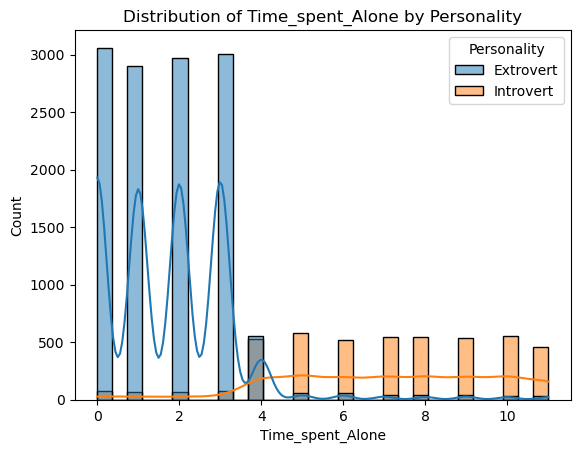

In [312]:
# Plot histogram with KDE overlay
sns.histplot(data=train, x="Time_spent_Alone", hue="Personality", kde=True, bins=30)
plt.title("Distribution of Time_spent_Alone by Personality")
plt.show()

In [313]:
# Compute medians for each personality type
median_extrovert = train.loc[train['Personality'] == 'Extrovert', 'Time_spent_Alone'].median()
median_introvert = train.loc[train['Personality'] == 'Introvert', 'Time_spent_Alone'].median()

# Define logic for imputation
def impute_time_spent(row):
    if pd.isnull(row['Time_spent_Alone']):
        if row['Personality'] == 'Extrovert':
            return median_extrovert
        elif row['Personality'] == 'Introvert':
            return median_introvert
    return row['Time_spent_Alone']

# Apply imputation
train['Time_spent_Alone'] = train.apply(impute_time_spent, axis=1)


In [314]:
# Check missing values
print(train["Post_frequency"].isnull().sum())

# Compare distribution statistics across personality types
print(train.groupby("Personality")["Post_frequency"].describe())

1264
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12922.0  6.113682  2.225713  0.0  4.0  6.0  8.0  10.0
Introvert     4338.0  1.611342  1.746218  0.0  0.0  1.0  2.0  10.0


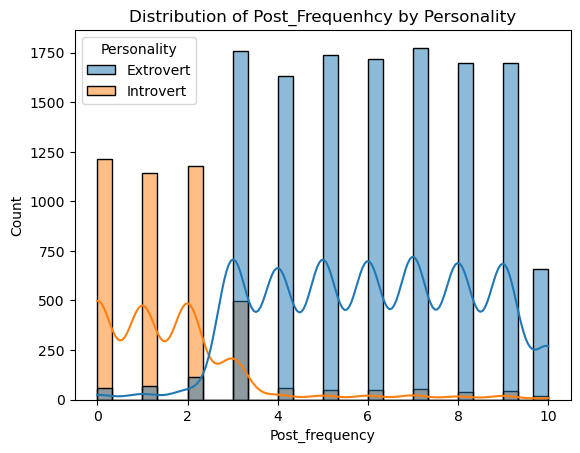

In [315]:
# Plot histogram with KDE overlay
sns.histplot(data=train, x="Post_frequency", hue="Personality", kde=True, bins=30)
plt.title("Distribution of Post_Frequenhcy by Personality")
plt.show()

In [316]:
# Define logic for imputation
def impute_post_freq(row):
    if pd.isnull(row['Post_frequency']):
        return 6.0 if row['Personality'] == 'Extrovert' else 1.0
    return row['Post_frequency']

# Apply imputation
train['Post_frequency'] = train.apply(impute_post_freq, axis=1)

In [317]:
# Check missing values
print(train["Social_event_attendance"].isnull().sum())

# Compare distribution statistics across personality types
print(train.groupby("Personality")["Social_event_attendance"].describe())

1180
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12967.0  6.389450  2.020741  0.0  5.0  6.0  8.0  10.0
Introvert     4377.0  1.934202  1.761425  0.0  1.0  2.0  3.0  10.0


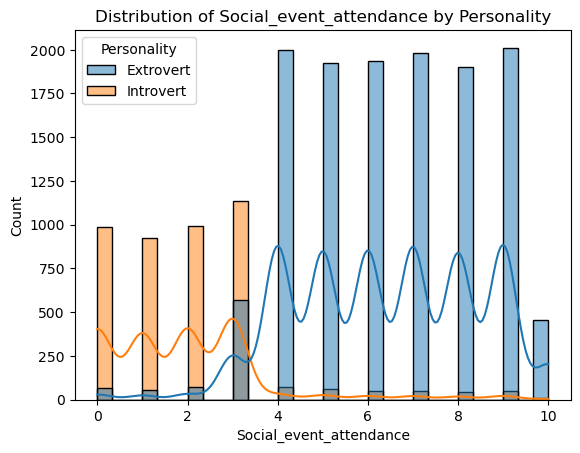

In [318]:
# Plot histogram with KDE overlay
sns.histplot(data=train, x="Social_event_attendance", hue="Personality", kde=True, bins=30)
plt.title("Distribution of Social_event_attendance by Personality")
plt.show()

In [319]:
# Define logic for imputation
def impute_post_freq(row):
    if pd.isnull(row['Social_event_attendance']):
        return 6.0 if row['Personality'] == 'Extrovert' else 2.0
    return row['Social_event_attendance']

# Apply imputation
train['Social_event_attendance'] = train.apply(impute_post_freq, axis=1)

In [320]:
# Check missing values
print(train["Friends_circle_size"].isnull().sum())

# Compare distribution statistics across personality types
print(train.groupby("Personality")["Friends_circle_size"].describe())

1054
               count      mean       std  min  25%   50%   75%   max
Personality                                                         
Extrovert    12999.0  9.624587  3.347242  0.0  7.0  10.0  12.0  15.0
Introvert     4471.0  3.263923  2.649747  0.0  1.0   3.0   4.0  15.0


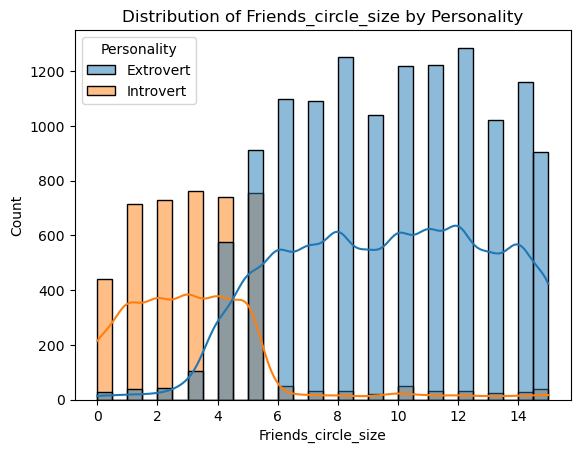

In [321]:
# Plot histogram with KDE overlay
sns.histplot(data=train, x="Friends_circle_size", hue="Personality", kde=True, bins=30)
plt.title("Distribution of Friends_circle_size by Personality")
plt.show()

In [322]:
# Define logic for imputation
def impute_post_freq(row):
    if pd.isnull(row['Friends_circle_size']):
        return 10.0 if row['Personality'] == 'Extrovert' else 3.0
    return row['Friends_circle_size']

# Apply imputation
train['Friends_circle_size'] = train.apply(impute_post_freq, axis=1)

In [323]:
# Check missing values
print(train["Going_outside"].isnull().sum())

# Compare distribution statistics across personality types
print(train.groupby("Personality")["Going_outside"].describe())

1466
               count      mean       std  min  25%  50%  75%  max
Personality                                                      
Extrovert    12737.0  4.895894  1.434279  0.0  4.0  5.0  6.0  7.0
Introvert     4321.0  1.534136  1.513918  0.0  0.0  1.0  2.0  7.0


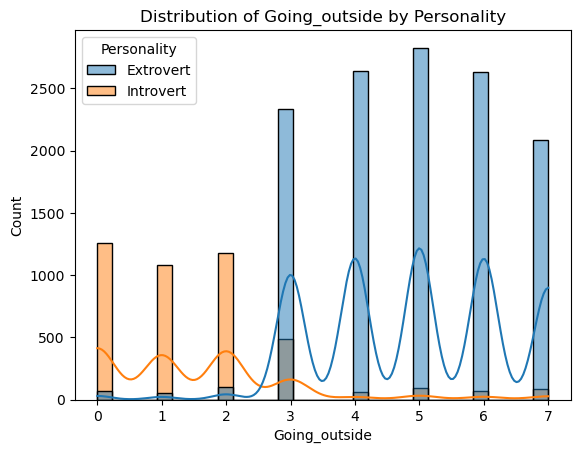

In [324]:
# Plot histogram with KDE overlay
sns.histplot(data=train, x="Going_outside", hue="Personality", kde=True, bins=30)
plt.title("Distribution of Going_outside by Personality")
plt.show()

In [325]:
# Define logic for imputation
def impute_post_freq(row):
    if pd.isnull(row['Going_outside']):
        return 5.0 if row['Personality'] == 'Extrovert' else 2.0
    return row['Going_outside']

# Apply imputation
train['Going_outside'] = train.apply(impute_post_freq, axis=1)

In [326]:
# Check for any remaining null values in the dataset
null_summary = train.isnull().sum()
null_summary = null_summary[null_summary > 0]

if null_summary.empty:
    print("✅ All missing values have been handled. No nulls remain in the dataset.")
else:
    print("⚠️ Nulls still present in the following columns:")
    print(null_summary)


✅ All missing values have been handled. No nulls remain in the dataset.


In [327]:
train['Stage_fear'].unique()

array(['No', 'Yes'], dtype=object)

In [328]:
# Encode binary categorical features: 'Yes'/'No' → 1/0
binary_cols = ["Stage_fear", "Drained_after_socializing"]
for col in binary_cols:
    train[col] = train[col].map({"Yes": 1, "No": 0})

In [329]:
# Encode target variable 'Personality' (Introvert/Extrovert → 0/1)
label_encoder = LabelEncoder()
train["Personality"] = label_encoder.fit_transform(train["Personality"])

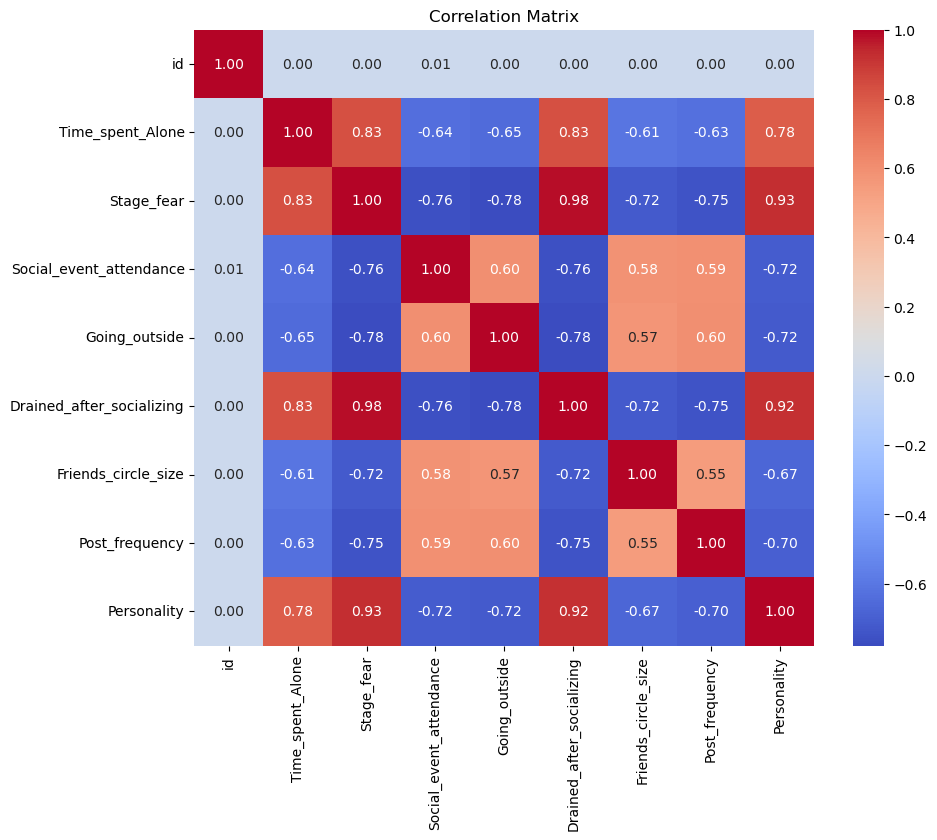

📉 Dropping highly correlated columns: ['Drained_after_socializing', 'Personality']


In [330]:
# Compute correlation matrix
corr_matrix = train.corr(numeric_only=True)

# Visualize it
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify columns with correlation above threshold (e.g., 0.9)
threshold = 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print(f"📉 Dropping highly correlated columns: {high_corr_cols}")

In [331]:
train = train.drop(columns=["Stage_fear"])

In [359]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# --- Step 1: Encode categorical features in X ---
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# --- Step 2: Encode target y ---
if y.dtype == "object":
    y_le = LabelEncoder()
    y = y_le.fit_transform(y)
else:
    y_le = None

# --- Step 3: Define CatBoost model ---
cat_model = CatBoostClassifier(
    iterations=200,
    depth=5,
    learning_rate=0.05,
    l2_leaf_reg=5,
    random_strength=3,
    verbose=0,
    random_state=42
)

# --- Step 4: Wrap with SMOTE ---
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', cat_model)
])

# --- Step 5: Train on full data ---
pipeline.fit(X, y)
print("✅ Model trained on full dataset")

# --- Step 6: Prepare test data ---
X_test_final = test.drop(columns=["id"]).copy()
for col in X_test_final.columns:
    if X_test_final[col].dtype == "object" and col in label_encoders:
        X_test_final[col] = label_encoders[col].transform(X_test_final[col])

# --- Step 7: Predict and create submission file ---
y_test_pred = pipeline.predict(X_test_final)

# Decode predictions if needed
if y_le:
    y_test_pred = y_le.inverse_transform(y_test_pred)

submission = pd.DataFrame({
    "id": test["id"],
    "Personality": y_test_pred
})
submission.to_csv("submission.csv", index=False)

print("📁 submission.csv created successfully.")


✅ Model trained on full dataset


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="No": Cannot convert 'No' to float

In [337]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define base learners
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', scale_pos_weight=3.0, random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42))
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
]

# Define final estimator
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Create StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# Evaluate with cross-validation
stacking_scores = cross_val_score(stacking_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("SMOTE + StackingClassifier CV Accuracy Scores:", stacking_scores)
print("SMOTE + StackingClassifier Mean Accuracy:", stacking_scores.mean())


SMOTE + StackingClassifier CV Accuracy Scores: [0.95985401 0.97572993 0.98868613 0.98594634 0.98886658]
SMOTE + StackingClassifier Mean Accuracy: 0.9798165990117542


In [340]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', scale_pos_weight=3.0, random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42))
]

# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9845
🧪 Test Accuracy (80/20 split): 0.9722
🔍 Accuracy Delta (Train - Test): 0.0123


In [341]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42))
]

# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9791
🧪 Test Accuracy (80/20 split): 0.9741
🔍 Accuracy Delta (Train - Test): 0.0050


In [342]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', scale_pos_weight=3.0, random_state=42)),
]

# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9806
🧪 Test Accuracy (80/20 split): 0.9717
🔍 Accuracy Delta (Train - Test): 0.0090


In [344]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
]

# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9810
🧪 Test Accuracy (80/20 split): 0.9741
🔍 Accuracy Delta (Train - Test): 0.0069


In [345]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
]

# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9944
🧪 Test Accuracy (80/20 split): 0.9673
🔍 Accuracy Delta (Train - Test): 0.0271


In [346]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = [
    ('lr', LogisticRegression(C=0.1, class_weight='balanced', penalty='l2', solver='liblinear', max_iter=1000)
),
    ('xgb', XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=3.0,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=2,
    random_state=42
)),
]

# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9694
🧪 Test Accuracy (80/20 split): 0.9698
🔍 Accuracy Delta (Train - Test): -0.0003


In [348]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = [
    ('lr', LogisticRegression(
    class_weight='balanced',
    C=0.1,
    solver='liblinear',
    max_iter=1000,
    random_state=42
)
),
    ('lgbm', LGBMClassifier(
    class_weight='balanced',
    n_estimators=150,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5,
    random_state=42
)
), ('xgb', XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=3.0,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=2,
    random_state=42
))
]

# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9731
🧪 Test Accuracy (80/20 split): 0.9738
🔍 Accuracy Delta (Train - Test): -0.0007


In [349]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define base learners
base_learners = learners = [
    ('lr', LogisticRegression(
        class_weight='balanced',
        C=0.1,
        solver='liblinear',
        max_iter=1000,
        random_state=42
    )),
    ('cat', CatBoostClassifier(
        iterations=200,
        depth=5,
        learning_rate=0.05,
        l2_leaf_reg=5,
        random_strength=3,
        verbose=0,
        random_state=42
    ))
]


# ✅ Step 2: Define final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 3: Create stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# ✅ Step 4: Wrap with SMOTE in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', stacking_model)
])

# ✅ Step 5: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 6: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 7: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy: 0.9741
🧪 Test Accuracy (80/20 split): 0.9735
🔍 Accuracy Delta (Train - Test): 0.0005


In [350]:
from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define CatBoost model with regularization
cat_model = CatBoostClassifier(
    iterations=200,
    depth=5,
    learning_rate=0.05,
    l2_leaf_reg=5,
    random_strength=3,
    verbose=0,
    random_state=42
)

# ✅ Step 2: Wrap CatBoost inside pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', cat_model)
])

# ✅ Step 3: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 4: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 5: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy (CatBoost only): {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy (CatBoost only): 0.9732
🧪 Test Accuracy (80/20 split): 0.9738
🔍 Accuracy Delta (Train - Test): -0.0006


In [351]:
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define LGBM model with tuned parameters
lgbm_model = LGBMClassifier(
    class_weight='balanced',
    n_estimators=150,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5,
    random_state=42
)

# ✅ Step 2: Wrap LGBM inside pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', lgbm_model)
])

# ✅ Step 3: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 4: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 5: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy (LGBM only): {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


[LightGBM] [Info] Number of positive: 10959, number of negative: 10959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 21918, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [352]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define Logistic Regression model (regularized)
lr_model = LogisticRegression(
    class_weight='balanced',
    C=0.1,                       # Add regularization to avoid overfitting
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

# ✅ Step 2: Wrap LR inside pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', lr_model)
])

# ✅ Step 3: Stratified 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 4: Train pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 5: Evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy (Logistic Regression only): {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy (Logistic Regression only): 0.9686
🧪 Test Accuracy (80/20 split): 0.9711
🔍 Accuracy Delta (Train - Test): -0.0025


In [353]:
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ Step 1: Define MLP (Neural Network) model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers with 64 and 32 neurons
    activation='relu',
    solver='adam',
    alpha=0.0005,                # L2 regularization term
    learning_rate='adaptive',    # Adjusts learning rate based on performance
    max_iter=1000,
    random_state=42
)

# ✅ Step 2: Wrap MLP in SMOTE pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', mlp_model)
])

# ✅ Step 3: 80/20 stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 4: Train model
pipeline.fit(X_train, y_train)

# ✅ Step 5: Evaluate model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Training Accuracy (MLP): {train_acc:.4f}")
print(f"🧪 Test Accuracy (80/20 split): {test_acc:.4f}")
print(f"🔍 Accuracy Delta (Train - Test): {delta:.4f}")


✅ Training Accuracy (MLP): 0.9748
🧪 Test Accuracy (80/20 split): 0.9714
🔍 Accuracy Delta (Train - Test): 0.0034


In [354]:
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define Deep MLP
mlp_deep = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,                 # L2 regularization
    learning_rate='adaptive',
    learning_rate_init=0.005,
    max_iter=1500,
    early_stopping=True,
    random_state=42
)

# Create pipeline
pipeline_deep = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', mlp_deep)
])

# Fit
pipeline_deep.fit(X_train, y_train)

# Evaluate
y_train_pred = pipeline_deep.predict(X_train)
y_test_pred = pipeline_deep.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Deep MLP Training Accuracy: {train_acc:.4f}")
print(f"🧪 Deep MLP Test Accuracy (80/20): {test_acc:.4f}")
print(f"🔍 Delta (Train - Test): {delta:.4f}")


✅ Deep MLP Training Accuracy: 0.9740
🧪 Deep MLP Test Accuracy (80/20): 0.9714
🔍 Delta (Train - Test): 0.0026


In [355]:
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Wide shallow MLP (simulate dropout with L2 + early stopping)
mlp_shallow = MLPClassifier(
    hidden_layer_sizes=(256,),      # One wide layer
    activation='tanh',
    solver='adam',
    alpha=0.01,                     # L2 penalty (simulates dropout regularization)
    learning_rate_init=0.001,
    early_stopping=True,
    max_iter=1000,
    random_state=42
)

# Pipeline
pipeline_shallow = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', mlp_shallow)
])

# Train
pipeline_shallow.fit(X_train, y_train)

# Evaluate
y_train_pred = pipeline_shallow.predict(X_train)
y_test_pred = pipeline_shallow.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Shallow MLP Training Accuracy: {train_acc:.4f}")
print(f"🧪 Shallow MLP Test Accuracy (80/20): {test_acc:.4f}")
print(f"🔍 Delta (Train - Test): {delta:.4f}")


✅ Shallow MLP Training Accuracy: 0.9681
🧪 Shallow MLP Test Accuracy (80/20): 0.9714
🔍 Delta (Train - Test): -0.0032


In [356]:
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Small MLP with high regularization (ridge-style)
mlp_small_ridge = MLPClassifier(
    hidden_layer_sizes=(64, 32),     # Two small dense layers
    activation='relu',
    solver='adam',
    alpha=0.1,                        # Strong L2 regularization
    learning_rate_init=0.001,
    early_stopping=True,
    max_iter=1000,
    random_state=42
)

# SMOTE + MLP pipeline
pipeline_ridge = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', mlp_small_ridge)
])

# Train
pipeline_ridge.fit(X_train, y_train)

# Evaluate
y_train_pred = pipeline_ridge.predict(X_train)
y_test_pred = pipeline_ridge.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
delta = train_acc - test_acc

print(f"✅ Ridge-Style MLP Training Accuracy: {train_acc:.4f}")
print(f"🧪 Ridge-Style MLP Test Accuracy (80/20): {test_acc:.4f}")
print(f"🔍 Delta (Train - Test): {delta:.4f}")


✅ Ridge-Style MLP Training Accuracy: 0.9702
🧪 Ridge-Style MLP Test Accuracy (80/20): 0.9722
🔍 Delta (Train - Test): -0.0020


In [362]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# --- Step 1: Encode categorical features in X ---
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# --- Step 2: Encode target y ---
if y.dtype == "object":
    y_le = LabelEncoder()
    y = y_le.fit_transform(y)
else:
    y_le = None

# --- Step 3: Define CatBoost model ---
cat_model = CatBoostClassifier(
    iterations=200,
    depth=5,
    learning_rate=0.05,
    l2_leaf_reg=5,
    random_strength=3,
    verbose=0,
    random_state=42
)

# --- Step 4: Wrap with SMOTE ---
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', cat_model)
])

# --- Step 5: Train on full data ---
pipeline.fit(X, y)

# --- Step 6: Evaluate training accuracy ---
y_pred_train = pipeline.predict(X)
train_acc = accuracy_score(y, y_pred_train)

print("✅ Model trained on full dataset")
print(f"🎯 Training Accuracy: {train_acc:.4f}")


✅ Model trained on full dataset
🎯 Training Accuracy: 0.9740


In [39]:
# Check null count
print(train["Time_spent_Alone"].isnull().sum())

# Compare distribution across Personality types
train.groupby("Personality")["Time_spent_Alone"].describe()


1190


,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
Extrovert,12790.0,1.747146,1.537609,0.0,1.0,2.0,3.0,11.0
Introvert,4544.0,7.051937,2.645865,0.0,5.0,7.0,9.0,11.0


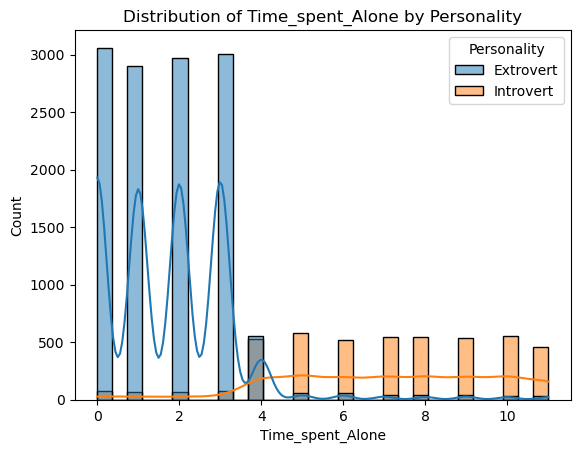

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=train, x="Time_spent_Alone", hue="Personality", kde=True, bins=30)
plt.title("Distribution of Time_spent_Alone by Personality")
plt.show()


In [41]:
# Example imputation
median_extrovert = train.loc[train['Personality'] == 'Extrovert', 'Time_spent_Alone'].median()
median_introvert = train.loc[train['Personality'] == 'Introvert', 'Time_spent_Alone'].median()

def impute_time_spent(row):
    if pd.isnull(row['Time_spent_Alone']):
        if row['Personality'] == 'Extrovert':
            return median_extrovert
        elif row['Personality'] == 'Introvert':
            return median_introvert
    return row['Time_spent_Alone']

train['Time_spent_Alone'] = train.apply(impute_time_spent, axis=1)


,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
Extrovert,12922.0,6.113682,2.225713,0.0,4.0,6.0,8.0,10.0
Introvert,4338.0,1.611342,1.746218,0.0,0.0,1.0,2.0,10.0


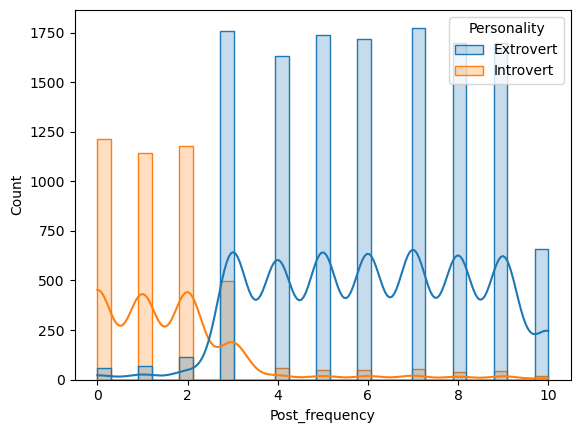

In [42]:
# Histogram + KDE by Personality
sns.histplot(data=train, x='Post_frequency', hue='Personality', kde=True, element='step')

# Summary
train.groupby('Personality')['Post_frequency'].describe()


In [43]:
def impute_post_freq(row):
    if pd.isnull(row['Post_frequency']):
        return 6.0 if row['Personality'] == 'Extrovert' else 1.0
    return row['Post_frequency']

train['Post_frequency'] = train.apply(impute_post_freq, axis=1)


,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
Extrovert,12967.0,6.389450,2.020741,0.0,5.0,6.0,8.0,10.0
Introvert,4377.0,1.934202,1.761425,0.0,1.0,2.0,3.0,10.0


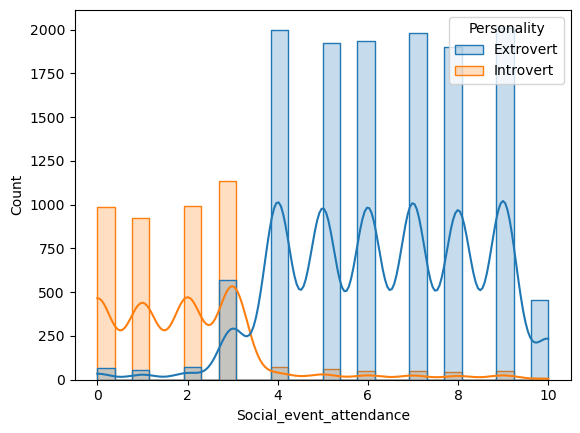

In [44]:
# Histogram + KDE by Personality
sns.histplot(data=train, x='Social_event_attendance', hue='Personality', kde=True, element='step')

# Summary
train.groupby('Personality')['Social_event_attendance'].describe()


In [46]:
def impute_social_event_attendance(row):
    if pd.isnull(row['Social_event_attendance']):
        return 6.0 if row['Personality'] == 'Extrovert' else 2.0
    return row['Social_event_attendance']

train['Social_event_attendance'] = train.apply(impute_social_event_attendance, axis=1)


In [47]:
def impute_friends_circle_size(row):
    if pd.isnull(row['Friends_circle_size']):
        return 10.0 if row['Personality'] == 'Extrovert' else 3.0
    return row['Friends_circle_size']

train['Friends_circle_size'] = train.apply(impute_friends_circle_size, axis=1)


,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
Extrovert,13699.0,9.64377,3.261643,0.0,7.0,10.0,12.0,15.0
Introvert,4825.0,3.24456,2.551599,0.0,2.0,3.0,4.0,15.0


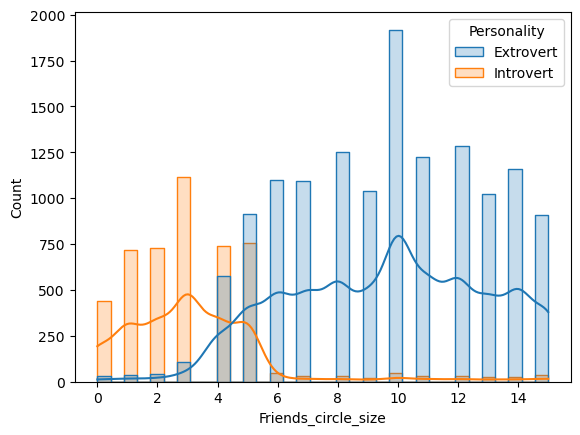

In [48]:
# Histogram + KDE by Personality
sns.histplot(data=train, x='Friends_circle_size', hue='Personality', kde=True, element='step')

# Summary
train.groupby('Personality')['Friends_circle_size'].describe()


Normalized Crosstab (%):

Going_outside        0.0        1.0        2.0        3.0        4.0  \
Personality                                                            
Extrovert       0.533878   0.392557   0.769412  18.308864  20.719165   
Introvert      29.067346  25.109928  27.331636  11.339968   1.481139   

Going_outside        5.0        6.0        7.0  
Personality                                     
Extrovert      22.203031  20.672058  16.401036  
Introvert       2.198565   1.596853   1.874566  

Raw Counts:

Going_outside   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0
Personality                                                  
Extrovert        68    50    98  2332  2639  2828  2633  2089
Introvert      1256  1085  1181   490    64    95    69    81


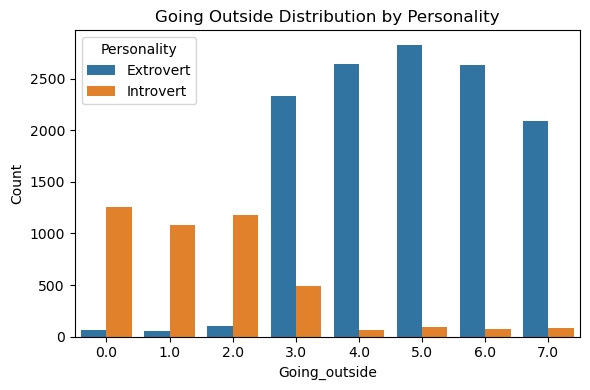

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crosstab: Percentage distribution
print("Normalized Crosstab (%):\n")
print(pd.crosstab(train['Personality'], train['Going_outside'], normalize='index') * 100)

# 2. Crosstab: Raw counts
print("\nRaw Counts:\n")
print(pd.crosstab(train['Personality'], train['Going_outside']))

# 3. Countplot for visual analysis
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Going_outside', hue='Personality')
plt.title("Going Outside Distribution by Personality")
plt.ylabel("Count")
plt.xlabel("Going_outside")
plt.legend(title='Personality')
plt.tight_layout()
plt.show()


In [51]:
# Optional alternative using mode
def impute_going_outside_mode(row):
    if pd.isnull(row['Going_outside']):
        return 5 if row['Personality'] == 'Extrovert' else 2 
    return row['Going_outside']
train['Going_outside'] = train.apply(impute_going_outside_mode, axis=1)

In [52]:
# Check for any remaining null values in the dataset
null_summary = train.isnull().sum()
null_summary = null_summary[null_summary > 0]

if null_summary.empty:
    print("✅ All missing values have been handled. No nulls remain in the dataset.")
else:
    print("⚠️ Nulls still present in the following columns:")
    print(null_summary)


✅ All missing values have been handled. No nulls remain in the dataset.


In [53]:
train.to_csv("cleaned_train.csv", index=False)

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train["Personality"] = label_encoder.fit_transform(train["Personality"])

In [57]:
binary_cols = ["Stage_fear", "Drained_after_socializing"]
for col in binary_cols:
    train[col] = train[col].map({"Yes": 1, "No": 0})


In [27]:
binary_cols = ["Stage_fear", "Drained_after_socializing"]
for col in binary_cols:
    train[col] = train[col].map({"Yes": 1, "No": 0})


In [59]:
X = train.drop(columns=["id", "Personality"])
y = train["Personality"]


In [60]:
print(train[["Stage_fear", "Drained_after_socializing"]].isnull().sum())


Stage_fear                   0
Drained_after_socializing    0
dtype: int64


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define features and labels
X = train.drop(columns=["id", "Personality"])
y = train["Personality"]

# Initialize Logistic Regression
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'  # handle class imbalance
)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_scores = cross_val_score(lr_model, X, y, cv=cv, scoring='accuracy')

# Print results
print(f"Logistic Regression CV Accuracy Scores: {lr_scores}")
print(f"Logistic Regression Mean Accuracy: {lr_scores.mean():.5f}")


Logistic Regression CV Accuracy Scores: [0.96977058 0.96977058 0.96761134 0.97246964 0.97192225]
Logistic Regression Mean Accuracy: 0.97031


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# ✅ 1. Define the model with class_weight='balanced'
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Handles class imbalance
    n_estimators=100,
    max_depth=None,
    n_jobs=-1
)

# ✅ 2. Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ✅ 3. Run cross-validation using accuracy
rf_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

# ✅ 4. Print results
print("Random Forest CV Accuracy Scores:", np.round(rf_scores, 5))
print("Random Forest Mean Accuracy:", np.round(rf_scores.mean(), 5))


Random Forest CV Accuracy Scores: [0.96761 0.97031 0.9695  0.97301 0.97273]
Random Forest Mean Accuracy: 0.97063


In [63]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1. Define the model
# Compute scale_pos_weight = (negative class) / (positive class)
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# 2. Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

# 3. Print results
print("XGBoost CV Accuracy Scores:", xgb_scores)
print("XGBoost Mean Accuracy:", xgb_scores.mean())


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:34:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:34:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:34:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:34:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

XGBoost CV Accuracy Scores: [0.96977058 0.97139001 0.9708502  0.97300945 0.97543197]
XGBoost Mean Accuracy: 0.9720904416715488


In [64]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define model with class imbalance handling
lgb_model = lgb.LGBMClassifier(
    is_unbalance=True,
    random_state=42,
    n_estimators=100,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    n_jobs=-1
)

# 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgb_scores = cross_val_score(lgb_model, X, y, cv=cv, scoring='accuracy')

# Print results
print("LightGBM CV Accuracy Scores:", lgb_scores)
print("LightGBM Mean Accuracy:", lgb_scores.mean())


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260476 -> initscore=-1.043494
[LightGBM] [Info] Start training from score -1.043494
[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Model
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_scores = cross_val_score(svm_model, X, y, cv=cv, scoring='accuracy')

# Output
print("SVM CV Accuracy Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())


SVM CV Accuracy Scores: [0.96896086 0.96680162 0.96545209 0.9705803  0.97138229]
SVM Mean Accuracy: 0.9686354322423437


In [68]:
from catboost import CatBoostClassifier

# Model
cat_model = CatBoostClassifier(verbose=0, random_state=42, class_weights=[1, 3.0])

# Cross-validation
cat_scores = cross_val_score(cat_model, X, y, cv=cv, scoring='accuracy')

# Output
print("CatBoost CV Accuracy Scores:", cat_scores)
print("CatBoost Mean Accuracy:", cat_scores.mean())


CatBoost CV Accuracy Scores: [0.97004049 0.97381916 0.97165992 0.97489879 0.97597192]
CatBoost Mean Accuracy: 0.9732780551644936


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [71]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3.0, random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42))
], voting='soft')

# Evaluate
voting_scores = cross_val_score(voting_model, X, y, cv=cv, scoring='accuracy')
print("VotingClassifier CV Accuracy Scores:", voting_scores)
print("VotingClassifier Mean Accuracy:", voting_scores.mean())


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:58:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:58:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:58:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:59:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:59:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14820, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
VotingClassifier CV Accuracy Scores: [0.97004049 0.97354926 0.97300945 0.97516869 0.97651188]
VotingClassifier Mean Accuracy: 0.9736559520582482


In [72]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3.0, random_state=42)),
        ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stack_scores = cross_val_score(stack_model, X, y, cv=cv, scoring='accuracy')

print("StackingClassifier CV Accuracy Scores:", stack_scores)
print("StackingClassifier Mean Accuracy:", stack_scores.mean())


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:Bo

C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:02:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:Bo

C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [

C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 3088, number of negative: 8767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11855, number of used features: 7
[LightGBM] [Info] [binary:Bo

C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3860, number of negative: 10960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14820, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nchan\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:03:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

[LightGBM] [Info] Number of positive: 3088, number of negative: 8768
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11856, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 3088, number of negative: 8768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 11856, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Inf

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), 
                          activation='relu',
                          solver='adam',
                          alpha=1e-4,
                          max_iter=300,
                          random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using accuracy
mlp_scores = cross_val_score(mlp_model, X, y, cv=cv, scoring='accuracy')

# Print results
print("MLPClassifier CV Accuracy Scores:", mlp_scores)
print("MLPClassifier Mean Accuracy:", mlp_scores.mean())


MLPClassifier CV Accuracy Scores: [0.97219973 0.9708502  0.97139001 0.97381916 0.97651188]
MLPClassifier Mean Accuracy: 0.9729541976722833


In [74]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np

# Define SMOTE + MLP pipeline
mlp_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mlp_smote_scores = cross_val_score(mlp_pipeline, X, y, cv=cv, scoring='accuracy')

# Print results
print("SMOTE + MLPClassifier CV Accuracy Scores:", mlp_smote_scores)
print("SMOTE + MLPClassifier Mean Accuracy:", np.mean(mlp_smote_scores))


SMOTE + MLPClassifier CV Accuracy Scores: [0.96950067 0.97112011 0.96788124 0.97165992 0.97570194]
SMOTE + MLPClassifier Mean Accuracy: 0.9711727774328661


In [75]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier
import numpy as np

# Initialize SMOTE and CatBoost (no GPU, silent training)
smote = SMOTE(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

# Build pipeline
catboost_smote_pipeline = ImbPipeline([
    ('smote', smote),
    ('catboost', catboost)
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
catboost_smote_scores = cross_val_score(catboost_smote_pipeline, X, y, cv=cv, scoring='accuracy')

# Output results
print("SMOTE + CatBoost CV Accuracy Scores:", catboost_smote_scores)
print("SMOTE + CatBoost Mean Accuracy:", np.mean(catboost_smote_scores))


SMOTE + CatBoost CV Accuracy Scores: [0.9705803  0.97354926 0.97327935 0.9754386  0.9762419 ]
SMOTE + CatBoost Mean Accuracy: 0.9738178808043536


In [76]:
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Base models
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=3.0, random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

# Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('lgbm', lgbm)],
    voting='soft'
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
voting_scores = cross_val_score(voting_clf, X_resampled, y_resampled, cv=cv, scoring='accuracy')

# Results
print("SMOTE + VotingClassifier CV Accuracy Scores:", voting_scores)
print("SMOTE + VotingClassifier Mean Accuracy:", voting_scores.mean())


[LightGBM] [Info] Number of positive: 10959, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 21918, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 10959, number of negative: 10959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 21918, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 10959, number of negat

In [77]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define base learners
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', scale_pos_weight=3.0, random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42))
]

# Define final estimator
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Create StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,  # Set to True if you want to include raw features with predictions
    n_jobs=-1
)

# Evaluate with cross-validation
stacking_scores = cross_val_score(stacking_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("SMOTE + StackingClassifier CV Accuracy Scores:", stacking_scores)
print("SMOTE + StackingClassifier Mean Accuracy:", stacking_scores.mean())


SMOTE + StackingClassifier CV Accuracy Scores: [0.96386861 0.97718978 0.98959854 0.98795401 0.98795401]
SMOTE + StackingClassifier Mean Accuracy: 0.9813129893435187


In [91]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd

# -------- Step 1: Copy your training data --------
X = train.drop(columns=["id", "Personality"]).copy()
y = train["Personality"].copy()

# -------- Step 2: Encode categorical columns --------
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Save encoder for later use on test set

# Encode target if it's not numeric
if y.dtype == "object":
    y_le = LabelEncoder()
    y = y_le.fit_transform(y)
else:
    y_le = None

# -------- Step 3: SMOTE --------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# -------- Step 4: Define base and final estimators --------
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', scale_pos_weight=1, use_label_encoder=False, random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
]

final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# -------- Step 5: Stacking classifier --------
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# -------- Step 6: Fit --------
stacking_clf.fit(X_resampled, y_resampled)
print("✅ Retraining on encoded training data completed.")


✅ Retraining on encoded training data completed.


In [363]:
X_test = pd.read_csv(os.path.join(path, 'test.csv'))

In [364]:
X_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [365]:
print("Shape:", X_test.shape)
print("\nColumns:", X_test.columns.tolist())
print("\nNull value count:\n", X_test.isnull().sum())

# Preview the data
print("\nSample rows:\n", X_test.head())

Shape: (6175, 8)

Columns: ['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']

Null value count:
 id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

Sample rows:
       id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0  18524               3.0         No                      7.0            4.0   
1  18525               NaN        Yes                      0.0            0.0   
2  18526               3.0         No                      5.0            6.0   
3  18527               3.0         No                      4.0            4.0   
4  18528               9.0        Yes                      1.0            2.0   

  Drained_after_soc

In [366]:
mean_time_spent = train["Time_spent_Alone"].mean()
X_test["Time_spent_Alone"] = X_test["Time_spent_Alone"].fillna(mean_time_spent)


In [367]:
median_post_freq = train["Post_frequency"].median()
X_test["Post_frequency"] = X_test["Post_frequency"].fillna(median_post_freq)


In [368]:
mean_social_event = train["Social_event_attendance"].mean()
X_test["Social_event_attendance"] = X_test["Social_event_attendance"].fillna(mean_social_event)


In [369]:
mean_friends_circle = train["Friends_circle_size"].mean()
X_test["Friends_circle_size"] = X_test["Friends_circle_size"].fillna(mean_friends_circle)


In [370]:
mode_going_outside = train["Going_outside"].mode()[0]
X_test["Going_outside"] = X_test["Going_outside"].fillna(mode_going_outside)


In [371]:
def impute_drained_simplified(row):
    if pd.isna(row['Drained_after_socializing']):
        if row['Friends_circle_size'] <= 3 and row['Time_spent_Alone'] >= 6:
            return 'Yes'  # likely introvert
        else:
            return 'No'   # likely extrovert
    return row['Drained_after_socializing']

In [372]:
def impute_stage_fear_simplified(row):
    if pd.isna(row['Stage_fear']):
        if row['Social_event_attendance'] == 0 or row['Post_frequency'] == 0:
            return 'Yes'  # more stage fear likely
        else:
            return 'No'
    return row['Stage_fear']


In [373]:
X_test['Drained_after_socializing'] = X_test.apply(impute_drained_simplified, axis=1)
X_test['Stage_fear'] = X_test.apply(impute_stage_fear_simplified, axis=1)

In [374]:
binary_cols = ["Stage_fear", "Drained_after_socializing"]
for col in binary_cols:
    X_test[col] = X_test[col].map({"Yes": 1, "No": 0})


In [375]:
print("\nNull value count:\n", X_test.isnull().sum())


Null value count:
 id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [376]:
X_test["Drained_after_socializing"].unique()

array([0, 1], dtype=int64)

In [377]:
X_test["Stage_fear"].unique()

array([0, 1], dtype=int64)

In [210]:
test_preds = stacking_clf.predict(X_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- id


In [378]:
X_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.00000,0,7.0,4.0,0,6.0,5.0
1,18525,3.14052,1,0.0,0.0,1,5.0,1.0
2,18526,3.00000,0,5.0,6.0,0,15.0,9.0
3,18527,3.00000,0,4.0,4.0,0,5.0,6.0
4,18528,9.00000,1,1.0,2.0,1,1.0,1.0


In [379]:
print(X_test.isnull().sum())


id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [380]:
print("Stage_fear unique values before fillna:", test["Stage_fear"].unique())
print("Drained_after_socializing unique values before fillna:", test["Drained_after_socializing"].unique())


Stage_fear unique values before fillna: ['No' 'Yes' nan]
Drained_after_socializing unique values before fillna: ['No' 'Yes' nan]


In [381]:
print("Train mode values:")
print("Stage_fear:", train["Stage_fear"].mode()[0])
print("Drained_after_socializing:", train["Drained_after_socializing"].mode()[0])


Train mode values:


KeyError: 'Stage_fear'

In [211]:
submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


In [213]:
X_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.00000,0,7.0,4.0,0,6.0,5.0
1,18525,3.14052,1,0.0,0.0,1,5.0,1.0
2,18526,3.00000,0,5.0,6.0,0,15.0,9.0
3,18527,3.00000,0,4.0,4.0,0,5.0,6.0
4,18528,9.00000,1,1.0,2.0,1,1.0,1.0


In [218]:
# 1. Drop 'id' column for prediction
X_test_features = X_test.drop(columns=["id"])

# 2. Predict personality using the trained stacking classifier
test_preds = stacking_clf.predict(X_test_features)

# 3. Assign predictions to the submission DataFrame
submission["Personality"] = test_preds

# 4. Save final file
#submission.to_csv("C:\My_projects\kaggle_predict_introvers\final_submission1.csv", index=False)
#submission.to_csv("C:\\My_projects\\kaggle_predict_introvers\\final_submission1.csv", index=False)
submission.to_csv(r"C:\My_projects\kaggle_predict_introverts\final_submission1.csv", index=False)



print("✅ Final submission file saved as final_submission.csv")


✅ Final submission file saved as final_submission.csv


In [382]:
# Step 1: Encode test set using saved label_encoders
X_test_encoded = X_test.copy()
for col in X_test_encoded.columns:
    if col in label_encoders:
        le = label_encoders[col]
        X_test_encoded[col] = le.transform(X_test_encoded[col])

# Step 2: Drop 'id' column
X_test_features = X_test_encoded.drop(columns=["id"])

# Step 3: Predict using the trained pipeline (CatBoost + SMOTE)
test_preds = pipeline.predict(X_test_features)

# Step 4: Decode predictions if y was originally categorical
if y_le is not None:
    test_preds = y_le.inverse_transform(test_preds)

# Step 5: Assign predictions to the submission DataFrame
submission["Personality"] = test_preds

# Step 6: Save to CSV
submission.to_csv(r"C:\My_projects\kaggle_predict_introverts\final_submission.csv", index=False)

print("✅ Final submission file saved as final_submission.csv")


✅ Final submission file saved as final_submission.csv


In [385]:
print(test_preds)

[0 1 0 ... 0 0 1]


In [388]:
# Step 1: Encode test features
X_test_encoded = X_test.copy()
for col in X_test_encoded.columns:
    if col in label_encoders:
        X_test_encoded[col] = label_encoders[col].transform(X_test_encoded[col])

# Step 2: Drop 'id' before prediction
X_test_features = X_test_encoded.drop(columns=["id"])

# Step 3: Predict using trained pipeline
test_preds = pipeline.predict(X_test_features)

# Step 4: Map integer predictions to class labels manually
label_map = {0: "Extrovert", 1: "Introvert"}  # Update if your mapping is different
submission["Personality"] = [label_map[p] for p in test_preds]

# Step 5: Sanity check
print("🔍 Unique values in prediction:", submission["Personality"].unique())

# Step 6: Save to CSV
submission.to_csv(r"C:\My_projects\kaggle_predict_introverts\final_submission.csv", index=False)
print("✅ Final submission file saved as final_submission.csv")


🔍 Unique values in prediction: ['Extrovert' 'Introvert']
✅ Final submission file saved as final_submission.csv
